<a href="https://colab.research.google.com/github/vadimoz1032/LR-MLDL/blob/main/%D0%9B%D0%A0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовили студенты ИУ10-91, Грабчук Д.С., Конюхов М.В., Розанов В.В.

Импортируем все необходимые библиотеки Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Создадим экземпляр классификатора

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l1',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1e4,
    # параметр для остановки поиска решения.(прекращается процесс обучения когда приближаемся к локальному минимому равному переменной tol)
    tol=1e-4,
    # Так как распознается 2 класса. 
    multi_class='ovr'
    )

Разделим данные на целевые и нецелевые признаки

In [ ]:
X = data[data.columns[:-1]]
y = data['output']

X.shape

(303, 13)

Обучим модель

In [ ]:
model.fit(X, y)

LogisticRegression(C=10000.0, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
data_predict = model.predict(X) #предсказанные значения

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y, data_predict)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,106,32
1,13,152


In [ ]:
pred_prob = model.predict_proba(X) #выдает результат в виде вероятности

In [ ]:
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
#frp - false positive rate (горизонтальная ось)
#tpr (recall) - true positive rate (вертикальная ось)
# каждая точка на графике ROC AUC соответствует выбору некоторого порога (про это ниже)

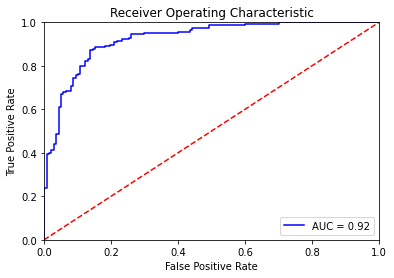

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Результаты применения L1 и L2

penalty='l2' C=1 AUC = 0.92

penalty='l2' C=1e2 AUC = 0.92

penalty='l2' C=1e4 AUC = 0.92

penalty='l1' C=1 AUC = 0.92

penalty='l1' C=1e2 AUC = 0.92

penalty='l1' C=1e4 AUC = 0.92

переменные tol и multi_class не менялись

In [ ]:
model.coef_

array([[-0.00476428, -1.75725558,  0.85969905, -0.0194518 , -0.00462507,
         0.03445107,  0.46675956,  0.02328342, -0.97921017, -0.5399689 ,
         0.57929861, -0.77329337, -0.90015248]])

In [ ]:
len(model.coef_[0])

13

In [ ]:
data1 = pd.read_csv('/content/heart.csv')

X = data1[data.columns[:-1]]
y = data1['output']

X.shape

(303, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор
clf = KNeighborsClassifier(n_neighbors=4)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
clf.score(X_test, y_test)

0.5789473684210527